In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2139,2140,CA-2015-159520,06/06/2015,11/06/2015,Standard Class,GT-14635,Grant Thornton,Corporate,United States,Long Beach,New York,11561.0,East,OFF-BI-10003982,Office Supplies,Binders,Wilson Jones Century Plastic Molded Ring Binders,149.544
5700,5701,CA-2017-125661,24/11/2017,26/11/2017,First Class,CA-12055,Cathy Armstrong,Home Office,United States,Cleveland,Ohio,44105.0,East,OFF-EN-10001532,Office Supplies,Envelopes,Brown Kraft Recycled Envelopes,40.752
8298,8299,US-2016-158911,05/07/2016,11/07/2016,Standard Class,RS-19765,Roland Schwarz,Corporate,United States,Charlotte,North Carolina,28205.0,South,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
3373,3374,CA-2016-161718,04/12/2016,10/12/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Hempstead,New York,11550.0,East,FUR-FU-10002445,Furniture,Furnishings,"DAX Two-Tone Rosewood/Black Document Frame, De...",28.440
1933,1934,CA-2018-161200,06/08/2018,10/08/2018,Second Class,SV-20365,Seth Vernon,Consumer,United States,Lafayette,Louisiana,70506.0,South,FUR-FU-10001706,Furniture,Furnishings,Longer-Life Soft White Bulbs,15.400
5252,5253,CA-2016-132318,30/10/2016,02/11/2016,First Class,TT-21220,Thomas Thornton,Consumer,United States,Virginia Beach,Virginia,23464.0,South,OFF-AP-10000026,Office Supplies,Appliances,Tripp Lite Isotel 6 Outlet Surge Protector wit...,182.910
7689,7690,US-2018-128951,15/07/2018,17/07/2018,First Class,RS-19420,Ricardo Sperren,Corporate,United States,Suffolk,Virginia,23434.0,South,OFF-AP-10002191,Office Supplies,Appliances,Belkin 8 Outlet SurgeMaster II Gold Surge Prot...,179.940
5806,5807,CA-2017-149783,04/09/2017,07/09/2017,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Knoxville,Tennessee,37918.0,South,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",12.192
7387,7388,CA-2017-105732,13/09/2017,18/09/2017,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104.0,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",1336.440
6176,6177,CA-2016-158421,21/09/2016,26/09/2016,Standard Class,GB-14575,Giulietta Baptist,Consumer,United States,Columbia,South Carolina,29203.0,South,OFF-ST-10002444,Office Supplies,Storage,Recycled Eldon Regeneration Jumbo File,85.960


In [4]:
data.shape

(9800, 18)

In [5]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


9800 satır, 18 sütundan oluşan veri seti. Çok sütun olmasına rağmen sayısal veri çok az. Gereksiz olan Id sütunlarını silelim.

In [6]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [9]:
df = data.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID'], axis=1)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Posta kodunda 11 adet boş veri var

In [12]:
df[df['Postal Code'].isnull()]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Boş olanların hepsinin şehri 'Burlington'. Burlington'ın posta kodunu direkt yazabilirim demektir.

In [13]:
df['Postal Code'] = df['Postal Code'].fillna(5402)

In [14]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
#Ay sütunu oluşturma
df['Month'] = df['Order Date'].str[3:5]
df['Month'] = df['Month'].astype('int32')
df.sample(5)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
2621,22/12/2018,26/12/2018,Standard Class,Jim Mitchum,Corporate,United States,Carlsbad,New Mexico,88220.0,West,Office Supplies,Labels,Avery 517,18.45,12
5661,24/09/2017,01/10/2017,Standard Class,Craig Leslie,Home Office,United States,Aurora,Colorado,80013.0,West,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,21.44,9
4190,17/11/2018,22/11/2018,Standard Class,Hunter Lopez,Consumer,United States,Newark,Delaware,19711.0,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,11
6450,25/09/2016,29/09/2016,Standard Class,Erica Hackney,Consumer,United States,Meriden,Connecticut,6450.0,East,Office Supplies,Paper,"Xerox Color Copier Paper, 11"" x 17"", Ream",45.68,9
1049,27/05/2015,01/06/2015,Second Class,Lena Creighton,Consumer,United States,San Francisco,California,94109.0,West,Technology,Accessories,Logitech Wireless Performance Mouse MX for PC ...,99.99,5


In [20]:
#Ayları isimlere dönüştürme
months = {1:'ocak', 2:'şubat', 3:'mart', 4:'nisan', 5:'mayıs', 6:'haziran', 7:'temmuz', 8:'ağustos', 9:'eylül', 10:'ekim', 11:'kasım', 12:'aralık',}
df['Month'] = [months[i] for i in df['Month']]
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,kasım
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,kasım
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,haziran
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,ekim
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,ekim


In [27]:
#Yıllara göre
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed')
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,kasım
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,kasım
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,haziran
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,ekim
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,ekim


In [28]:
df['Year'] = df['Order Date'].dt.year
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,kasım,2017
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,kasım,2017
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,haziran,2017
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,ekim,2016
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,ekim,2016


In [ ]:
#Yıllara göre satış sayısı
df['Year'].value_counts()

Year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

In [34]:
#Hangi ayda satış fazla
#df['Month'].value_counts()
months_df = df.groupby('Month').sum(numeric_only=True)
months_df

,Postal Code,Sales,Year
Month,,,
aralık,79735933.0,321480.1695,2787094
ağustos,39887477.0,157315.9270,1397545
ekim,46963820.0,199496.2947,1631565
eylül,71845070.0,300103.4117,2730652
haziran,37001159.0,145837.5233,1393591
kasım,79477024.0,350161.7110,2922156
mart,37422279.0,197573.5872,1371361
mayıs,39303261.0,154086.7237,1462180
nisan,34472176.0,136283.0006,1324950


In [36]:
months_df = months_df[['Sales']]
months_df.reset_index(inplace=True)
months_df

,Month,Sales
0,aralık,321480.1695
1,ağustos,157315.9270
2,ekim,199496.2947
3,eylül,300103.4117
4,haziran,145837.5233
5,kasım,350161.7110
6,mart,197573.5872
7,mayıs,154086.7237
8,nisan,136283.0006
9,ocak,94291.6296


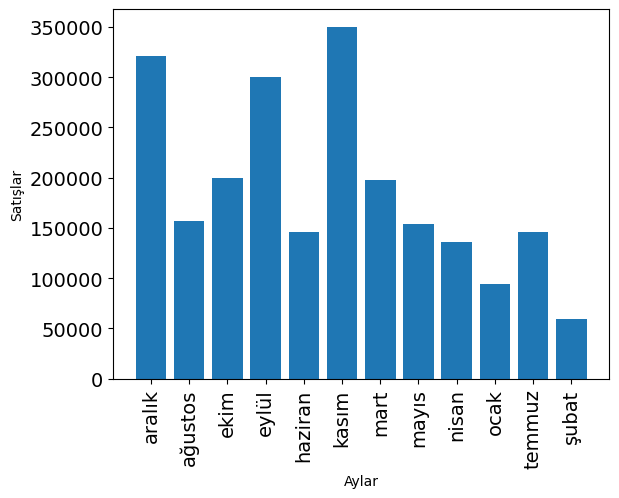

In [38]:
plt.bar(months_df['Month'], months_df['Sales'])
plt.xlabel('Aylar')
plt.ylabel('Satışlar')
plt.xticks(fontsize= 14, rotation= 90)
plt.yticks(fontsize= 14)
plt.show()

In [ ]:
#Yıl bazlı satışlar
year_df = df.groupby('Year').sum(numeric_only=True)
year_df = year_df[['Sales']]
year_df.reset_index(inplace=True)
year_df

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


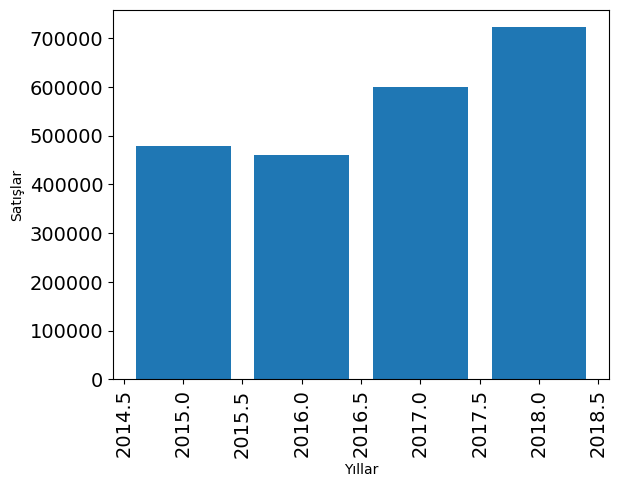

In [41]:
plt.bar(year_df['Year'], year_df['Sales'])
plt.xlabel('Yıllar')
plt.ylabel('Satışlar')
plt.xticks(fontsize= 14, rotation= 90)
plt.yticks(fontsize= 14)
plt.show()

In [45]:
#Customer bazlı satışlar
customer = df.groupby('Customer Name').sum(numeric_only=True).sort_values('Sales', ascending=False)
customer.drop(['Postal Code', 'Year'], axis=1, inplace=True)
customer.reset_index(inplace=True)
customer

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
...,...,...
788,Mitch Gastineau,16.739
789,Carl Jackson,16.520
790,Sung Chung,14.112
791,Lela Donovan,5.304


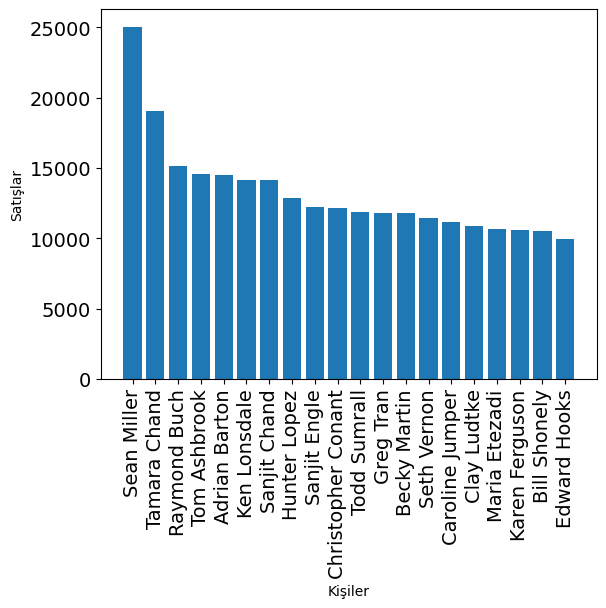

In [46]:
#ilk 20'sinin grafiği için
customer = customer.head(20)
plt.bar(customer['Customer Name'], customer['Sales'])
plt.xlabel('Kişiler')
plt.ylabel('Satışlar')
plt.xticks(fontsize= 14, rotation= 90)
plt.yticks(fontsize= 14)
plt.show()

In [48]:
#Kategori bazlı satışlar
category = df.groupby('Category').sum(numeric_only=True).sort_values('Sales', ascending=False)
category.drop(['Postal Code', 'Year'], axis=1, inplace=True)
category.reset_index(inplace=True)
category

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


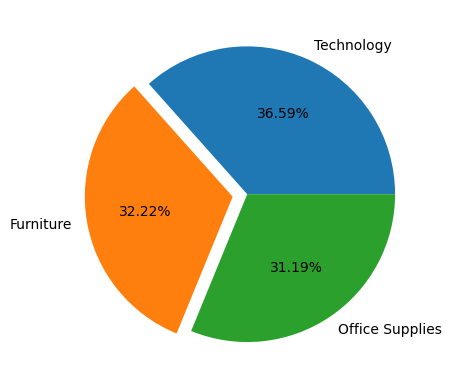

In [54]:
plt.pie(category['Sales'], labels= category['Category'], autopct='%0.2f%%', explode=[0,0.1,0])
plt.show()
